In [17]:
# Need to set up the zero case

import pandas as pd
from ClassificationNLP import Classification_NLP
pd.set_option('display.max_columns', None)
import sentence_to_feature as stfu
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
directory = "../data/feature_sets/"
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))
            
            
scores = pd.DataFrame(columns = ['dataset', 'score', 'type'])

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    nlp = Classification_NLP(datasets['data'][i], datasets['doc'][i], .8  )
#     row['score'],_  = nlp.accuracy()
#     row['score'] = nlp.f1_scorer()
#     row['score'] = nlp.recall()
    row['score'] = nlp.precision()
#     row['score'] = nlp.balanced_accuracy()
    row['type'] = 'Classification'
    i+=1
    scores = scores.append(row, ignore_index = True)

c:\users\imcna\.virtualenvs\answer_clustering-dp5vzxyv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\imcna\.virtualenvs\answer_clustering-dp5vzxyv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\imcna\.virtualenvs\answer_clustering-dp5vzxyv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\imcna\.virtualenvs\

In [18]:
from ClusteringNLP import Clustering_NLP
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    nlp = Clustering_NLP(datasets['data'][i], datasets['doc'][i])
    nlp.correct_cluster_labels()
#     row['score'] = nlp.accuracy()
#     row['score'] = nlp.f1_scorer()
#     row['score'] = nlp.recall()
    row['score'] = nlp.precision()
#     row['score'] = nlp.balanced_accuracy()
    i+=1
    row['type'] = 'Clustering'
    scores = scores.append(row, ignore_index = True)

In [19]:
from AutomatedSARGrading import Automated_SAR_Grading
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    answer_row = len(datasets['data'][i]) -1
    sar = Automated_SAR_Grading(datasets['data'][i], datasets['doc'][i], answer_row)
#     row['score'] = sar.run()
    sar.run()
#     row['score'] = sar.accuracy()
#     row['score'] = sar.f1_scorer()
#     row['score'] = sar.recall()
    row['score'] = sar.precision()
#     row['score'] = sar.balanced_accuracy()
    i+=1
    row['type'] = 'Combination'
    scores = scores.append(row, ignore_index = True)

c:\users\imcna\.virtualenvs\answer_clustering-dp5vzxyv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\imcna\.virtualenvs\answer_clustering-dp5vzxyv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


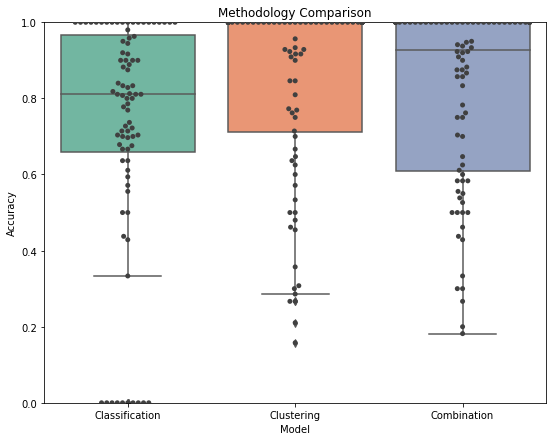

In [20]:
plt.figure(figsize = (9,7))
sns.boxplot(
    data = scores,
    x = 'type',
    y = 'score',
    palette = 'Set2'
)
sns.swarmplot(
    data = scores,
    x = 'type',
    y = 'score',
    color = "0.25"
)
plt.ylim(0,1)
plt.title("Methodology Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [21]:
scores.to_csv(
    'prec_comparisons.csv',
    index = False
)

In [22]:
scores[scores.type == "Classification"].score.mean()

0.7217650002589835

In [23]:
scores[scores.type == "Clustering"].score.mean()

0.8346514035596156

In [24]:
scores[scores.type == "Combination"].score.mean()

0.8106239248452518